In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
#download mnist data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
test_image = X_test[:5]
test_types = y_test[:5]

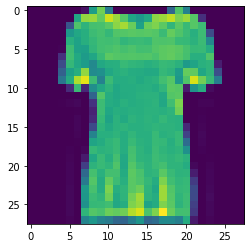

In [ ]:
#show image
plt.imshow(X_train[10])

In [ ]:
#image shape
X_train[0].shape

(28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
#Create dictionary of target classes
label_dict = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Snearker', 8:'bag', 9:'Ankle'}

In [ ]:
#one-hot encoder target
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
#create model
model = Sequential()
#add layer
#lop convluation 1
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) #Gom 64 bo loc, filer maxtrix 3x3
model.add(MaxPooling2D(2,2))#maxpooling voi matran 2x2
model.add(Dropout(0.25))
#lop convluation 2
model.add(Conv2D(128, kernel_size=3, activation='relu')) #Gom 64 bo loc, filer maxtrix 3x3
model.add(MaxPooling2D(2,2))#maxpooling voi matran 2x2
model.add(Dropout(0.25))
model.add(Flatten())
#dua vao mang ANN
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [ ]:
from google.colab import drive
drive.mount('/content/gdrvie', force_remount=True)

Mounted at /content/gdrvie


In [ ]:
%cd '/content/drive/My Drive/LDS8_Le Quang Anh Tu/week2/Chapter4'

/content/drive/My Drive/LDS8_Le Quang Anh Tu/week2/Chapter4


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint('model_fashion_checkpoint_new.h5', save_best_only=True)]

In [ ]:
#compile model using accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=256, callbacks=callbacks)

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 1.7278 - accuracy: 0.6848 - val_loss: 0.4640 - val_accuracy: 0.8296
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.5087 - accuracy: 0.8147 - val_loss: 0.4123 - val_accuracy: 0.8455
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.4452 - accuracy: 0.8374 - val_loss: 0.3688 - val_accuracy: 0.8631
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.4056 - accuracy: 0.8506 - val_loss: 0.3519 - val_accuracy: 0.8716
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.3792 - accuracy: 0.8615 - val_loss: 0.3317 - val_accuracy: 0.8789
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.3585 - accuracy: 0.8676 - val_loss: 0.3163 - val_accuracy: 0.8825
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.3378 - accuracy: 0.8756 - val_loss: 0.3039 - val_accuracy: 0.8869
Epoch 

In [ ]:
#luu model
model.save('my_fashion_model_CNN_new.h5')
print('save')

save


In [ ]:
#show predict
result = model.predict(X_test[:5])
result.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
#show actual
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)